# Разведочный анализ данных (EDA) и отбор признаков (Feature selection)

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('/content/sample_data/final_data.csv')
print(data.head())

   Unnamed: 0                             address  \
0           2  Address: 1160 Mission Street #2007   
1           5       Address: 260 King Street #475   
2           7     Address: 560 Missouri Street #B   
3           9        Address: 350 Missouri Street   
4          11         Address: 3658 Folsom Street   

                                                info  \
0   San FranciscoSales price: 1300000Sales date: ...   
1   San FranciscoSales price: 750000Sales date: 0...   
2   San FranciscoSales price: 1495000Sales date: ...   
3   San FranciscoSales price: 2700000Sales date: ...   
4   San FranciscoSales price: 1530000Sales date: ...   

                   z_address  bathrooms  bedrooms  finishedsqft lastsolddate  \
0  1160 Mission St UNIT 2007        2.0       2.0        1043.0   02/17/2016   
1       260 King St UNIT 475        1.0       1.0         903.0   02/17/2016   
2        560 Missouri St # B        4.0       3.0        1425.0   02/17/2016   
3            350 Missour

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   info           11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  float64
 6   finishedsqft   11330 non-null  float64
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  float64
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  float64
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  float64
 15  zestimate      11330 non-null  float64
 16  zindexvalue    11330 non-null  object 
 17  zipcode        11330 non-null  float64
 18  zpid  

In [ ]:
# выясним количество уникальных значений в колонке
# функция так же ранжирует значения по частотности: самое частое вверху
# вывод: эта колонка не будет влиять на предсказание цен на квартиры
data['Unnamed: 0'].value_counts()

2        1
11984    1
12018    1
12019    1
12020    1
        ..
6536     1
6538     1
6539     1
6540     1
17632    1
Name: Unnamed: 0, Length: 11330, dtype: int64

In [ ]:
# рассмотрим колонку "info"
# функция предоставляет случайную запись
data['info'].sample(1).values[0]

' San FranciscoSales price: 845000Sales date: 10/14/2011Bedrooms: 0Square feet: 1799Lot size: 0'

In [ ]:
# исследуем колонку Lot size
# выделим ее из общего фрейма и переформатируем в строку, чтобы можно было с ней работать
data['info'].str.extract(r'Lot size: ([0-9]+)').values.reshape(-1)

array(['43557', '213232', '2496', ..., '2256', '2996', '1751'],
      dtype=object)

In [ ]:
# создадим новую переменную и новую колонку в данных lot size
data.loc[:, 'lot_size'] = data['info'].str.extract(r'Lot size: ([0-9]+)').values.reshape(-1)
print(data.head())

   Unnamed: 0                             address  \
0           2  Address: 1160 Mission Street #2007   
1           5       Address: 260 King Street #475   
2           7     Address: 560 Missouri Street #B   
3           9        Address: 350 Missouri Street   
4          11         Address: 3658 Folsom Street   

                                                info  \
0   San FranciscoSales price: 1300000Sales date: ...   
1   San FranciscoSales price: 750000Sales date: 0...   
2   San FranciscoSales price: 1495000Sales date: ...   
3   San FranciscoSales price: 2700000Sales date: ...   
4   San FranciscoSales price: 1530000Sales date: ...   

                   z_address  bathrooms  bedrooms  finishedsqft lastsolddate  \
0  1160 Mission St UNIT 2007        2.0       2.0        1043.0   02/17/2016   
1       260 King St UNIT 475        1.0       1.0         903.0   02/17/2016   
2        560 Missouri St # B        4.0       3.0        1425.0   02/17/2016   
3            350 Missour

In [ ]:
# посмотрим, чем отличаются колонки adress и z_adress
data[['address', 'z_address']]
# от колонки address можно избавится, так как z_adress
# является "очищенным" дубликатом, что можно увидеть в таблице

,address,z_address
0,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007
1,Address: 260 King Street #475,260 King St UNIT 475
2,Address: 560 Missouri Street #B,560 Missouri St # B
3,Address: 350 Missouri Street,350 Missouri St
4,Address: 3658 Folsom Street,3658 Folsom St
...,...,...
11325,Address: 149 Laidley Street,149 Laidley St
11326,Address: 737 Tehama Street #1,737 Tehama St # 1
11327,Address: 319 De Long Street,319 De Long St
11328,Address: 1655 48th Avenue,1655 48th Ave


In [ ]:
# проверим количество и уникальность значений z_adress
data['z_address'].value_counts()

1300 Eddy St                5
1015 Ashbury St APT 2       4
410 Jessie St STE 701       4
370 Church St APT F         4
576 Brunswick St            3
                           ..
740 Diamond St              1
1230-1234 Sanchez St        1
1310 Fillmore St APT 309    1
838 Lyon St                 1
1 Crescent Way APT 1103     1
Name: z_address, Length: 10684, dtype: int64

In [ ]:
# проанализируем значения в колонке neighborhood  
data['neighborhood'].value_counts()
# эти данные оставляем для исследований

Mission             540
Bernal Heights      525
South of Market     524
South Beach         461
Pacific Heights     439
                   ... 
North Beach          31
Lakeside             29
Little Hollywood     12
North Waterfront      8
Daly City             3
Name: neighborhood, Length: 71, dtype: int64

In [ ]:
# рассмотрим usecode  
data['usecode'].value_counts()

SingleFamily        5803
Condominium         4802
MultiFamily2To4      486
Duplex               146
Townhouse             66
Miscellaneous         17
Apartment              3
Cooperative            3
Mobile                 2
MultiFamily5Plus       2
Name: usecode, dtype: int64

In [ ]:
# посмотрим корреляцию между величинами
data.corr()
# lastsoldprice и zestimate имеют высокую корреляцию 0,88

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
Unnamed: 0,1.000000,0.014444,0.014139,0.011203,-0.134305,0.001656,0.000446,0.015472,0.003752,0.019365,0.009894,0.001525
bathrooms,0.014444,1.000000,0.714270,0.719096,0.536880,0.041632,-0.120276,0.135171,-0.094791,0.603158,0.090754,-0.047326
bedrooms,0.014139,0.714270,1.000000,0.697461,0.395478,-0.157859,-0.258338,0.155320,-0.312583,0.477676,0.197236,-0.101559
finishedsqft,0.011203,0.719096,0.697461,1.000000,0.647208,0.061655,-0.208110,0.156913,-0.283712,0.758493,0.126858,-0.079424
lastsoldprice,-0.134305,0.536880,0.395478,0.647208,1.000000,0.283107,-0.052595,0.093527,-0.189055,0.876939,0.018839,-0.038444
latitude,0.001656,0.041632,-0.157859,0.061655,0.283107,1.000000,0.117271,-0.007126,0.140987,0.309783,-0.314698,0.115466
longitude,0.000446,-0.120276,-0.258338,-0.208110,-0.052595,0.117271,1.000000,-0.054203,0.289189,-0.072770,-0.274959,0.129480
totalrooms,0.015472,0.135171,0.155320,0.156913,0.093527,-0.007126,-0.054203,1.000000,-0.061874,0.111990,0.034886,-0.010918
yearbuilt,0.003752,-0.094791,-0.312583,-0.283712,-0.189055,0.140987,0.289189,-0.061874,1.000000,-0.212563,-0.159110,0.187554
zestimate,0.019365,0.603158,0.477676,0.758493,0.876939,0.309783,-0.072770,0.111990,-0.212563,1.000000,0.034531,-0.034331


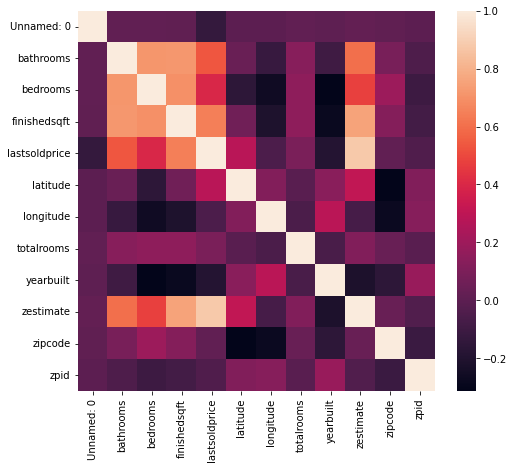

In [ ]:
# можно визуализировать корреляцию
import seaborn as sns
plt.figure(figsize=(8,7)) # задаем размеры будущего графика
sns.heatmap(data.corr())  # строим heatmap с данными по корреляции значений 
plt.show()                # отображаем график

In [ ]:
# оценим колонку zipcode 
data['zipcode'].value_counts()

94110.0    935
94112.0    877
94107.0    857
94131.0    687
94116.0    655
94109.0    653
94114.0    651
94122.0    601
94115.0    534
94121.0    527
94117.0    473
94118.0    466
94134.0    439
94127.0    435
94123.0    430
94124.0    393
94103.0    360
94105.0    340
94102.0    318
94132.0    292
94133.0    183
94108.0    114
94158.0     71
94111.0     38
94104.0      1
Name: zipcode, dtype: int64

In [ ]:
# посмотрим zpid
data['zpid'].value_counts()
# вероятно, это какой-то идентификатор, возможно связанный с адресами. Уберем. 

82785427.0    5
79843553.0    4
59779814.0    4
15143549.0    4
15131999.0    3
             ..
15127385.0    1
15132311.0    1
15181228.0    1
82785363.0    1
64972868.0    1
Name: zpid, Length: 10686, dtype: int64

In [ ]:
data['address'].value_counts() # цифры перебиваются с zpid 

Address: 1300 Eddy Street           5
Address: 1015 Ashbury Street #2     4
Address: 370 Church Street #F       4
Address: 475 Princeton Street       3
Address: 1800 Bryant Street #202    3
                                   ..
Address: 77 Belgrave Avenue         1
Address: 654 5th Avenue             1
Address: 1874 41st Avenue           1
Address: 25 Judah Street            1
Address: 1 Crescent Way #1103       1
Name: address, Length: 10730, dtype: int64

In [ ]:
# уберем ненужные колонки из данных 
# Unnamed - индексы. не несут пользы для исследования
# info - не является ценной для исследования, так как видимо содержит обобщающую информацию по недвижимости
# address - содержит полный адрес. нам подходит колонка z_address как содержащая "чистую", сокращенную запись
# latitude - долгота - может использоваться для исследования при отсутсвии адреса, например. в данном случае просто лишняя
# longitude - широта - то-же
drop_columns = ['Unnamed: 0', 'info', 'address', 'longitude', 'zpid']

In [ ]:
data.drop(drop_columns, axis=1, inplace=True) 
# axis=1 если не указать, то удаление произойдет по индексам
# inplace - указывает, что нужно переписать существующую переменную
print(data.head(5))

                   z_address  bathrooms  bedrooms  finishedsqft lastsolddate  \
0  1160 Mission St UNIT 2007        2.0       2.0        1043.0   02/17/2016   
1       260 King St UNIT 475        1.0       1.0         903.0   02/17/2016   
2        560 Missouri St # B        4.0       3.0        1425.0   02/17/2016   
3            350 Missouri St        3.0       3.0        2231.0   02/17/2016   
4             3658 Folsom St        3.0       3.0        1300.0   02/17/2016   

   lastsoldprice   latitude     neighborhood  totalrooms       usecode  \
0      1300000.0  37.778705  South of Market         4.0   Condominium   
1       750000.0  37.777641  South of Market         3.0   Condominium   
2      1495000.0  37.759198     Potrero Hill         6.0   Condominium   
3      2700000.0  37.761886     Potrero Hill        10.0  SingleFamily   
4      1530000.0  37.740795   Bernal Heights         4.0  SingleFamily   

   yearbuilt  zestimate zindexvalue  zipcode lot_size  
0     2007.0  1167

In [ ]:
# промежуточное сохранение материала, на всякий случай, отсебятина.
data.to_csv('final_data_result_lsn1.csv')

# Работа с пропусками и переменными

In [ ]:
import numpy as np
import pandas as dp
import seaborn as sns

from matplotlib import pyplot as plt

In [ ]:
# для примера, что можно сделать с данными и как дальше их проверять
# создадим копию данных, чтобы не испортить результат прошлой работы
# и искуственно внесем туда пропуски, чтобы поработать с ними
data_copy = data.copy()
print(data_copy.head())

                   z_address  bathrooms  bedrooms  finishedsqft lastsolddate  \
0  1160 Mission St UNIT 2007        2.0       2.0        1043.0   02/17/2016   
1       260 King St UNIT 475        1.0       1.0         903.0   02/17/2016   
2        560 Missouri St # B        4.0       3.0        1425.0   02/17/2016   
3            350 Missouri St        3.0       3.0        2231.0   02/17/2016   
4             3658 Folsom St        3.0       3.0        1300.0   02/17/2016   

   lastsoldprice   latitude     neighborhood  totalrooms       usecode  \
0      1300000.0  37.778705  South of Market         4.0   Condominium   
1       750000.0  37.777641  South of Market         3.0   Condominium   
2      1495000.0  37.759198     Potrero Hill         6.0   Condominium   
3      2700000.0  37.761886     Potrero Hill        10.0  SingleFamily   
4      1530000.0  37.740795   Bernal Heights         4.0  SingleFamily   

   yearbuilt  zestimate zindexvalue  zipcode lot_size  
0     2007.0  1167

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   z_address      11330 non-null  object 
 1   bathrooms      11330 non-null  float64
 2   bedrooms       11330 non-null  float64
 3   finishedsqft   11330 non-null  float64
 4   lastsolddate   11330 non-null  object 
 5   lastsoldprice  11330 non-null  float64
 6   latitude       11330 non-null  float64
 7   neighborhood   11330 non-null  object 
 8   totalrooms     11330 non-null  float64
 9   usecode        11330 non-null  object 
 10  yearbuilt      11330 non-null  float64
 11  zestimate      11330 non-null  float64
 12  zindexvalue    11330 non-null  object 
 13  zipcode        11330 non-null  float64
 14  lot_size       11330 non-null  object 
dtypes: float64(9), object(6)
memory usage: 1.3+ MB


In [ ]:
#@title Текст заголовка по умолчанию
index_for_drop = data_copy.sample(1000).index
print(index_for_drop)

Int64Index([ 4387,  8962,  4941,  5269,  5446, 10283,  7498,  4660,  2452,
             6214,
            ...
             9736, 10234,  9725,  4905,  1296,  5263,  9239,  6175,  9368,
             7893],
           dtype='int64', length=1000)


In [ ]:
data_copy.loc[index_for_drop, 'bathrooms'] = np.nan
data_copy.info()
# заменили часть значений bathrooms на nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   z_address      11330 non-null  object 
 1   bathrooms      10330 non-null  float64
 2   bedrooms       11330 non-null  float64
 3   finishedsqft   11330 non-null  float64
 4   lastsolddate   11330 non-null  object 
 5   lastsoldprice  11330 non-null  float64
 6   latitude       11330 non-null  float64
 7   neighborhood   11330 non-null  object 
 8   totalrooms     11330 non-null  float64
 9   usecode        11330 non-null  object 
 10  yearbuilt      11330 non-null  float64
 11  zestimate      11330 non-null  float64
 12  zindexvalue    11330 non-null  object 
 13  zipcode        11330 non-null  float64
 14  lot_size       11330 non-null  object 
dtypes: float64(9), object(6)
memory usage: 1.3+ MB


In [ ]:
# проверим наличие значений nan
data_copy.isnull().sum()

z_address           0
bathrooms        1000
bedrooms            0
finishedsqft        0
lastsolddate        0
lastsoldprice       0
latitude            0
neighborhood        0
totalrooms          0
usecode             0
yearbuilt           0
zestimate           0
zindexvalue         0
zipcode             0
lot_size            0
dtype: int64

In [ ]:
data_copy['bathrooms'] # убедимся еще раз, что nan появились

0        NaN
1        1.0
2        4.0
3        3.0
4        3.0
        ... 
11325    2.0
11326    2.0
11327    1.0
11328    1.0
11329    2.0
Name: bathrooms, Length: 11330, dtype: float64

In [ ]:
data_copy['bathrooms'] = data_copy['bathrooms'].fillna(0) # заменили nan на 0.0 и записали во фрейм
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   z_address      11330 non-null  object 
 1   bathrooms      11330 non-null  float64
 2   bedrooms       11330 non-null  float64
 3   finishedsqft   11330 non-null  float64
 4   lastsolddate   11330 non-null  object 
 5   lastsoldprice  11330 non-null  float64
 6   latitude       11330 non-null  float64
 7   neighborhood   11330 non-null  object 
 8   totalrooms     11330 non-null  float64
 9   usecode        11330 non-null  object 
 10  yearbuilt      11330 non-null  float64
 11  zestimate      11330 non-null  float64
 12  zindexvalue    11330 non-null  object 
 13  zipcode        11330 non-null  float64
 14  lot_size       11330 non-null  object 
dtypes: float64(9), object(6)
memory usage: 1.3+ MB


In [ ]:
# еще один способ замены пропущенных значений - замена средними значениями (медианой)
data_copy_2 = data.copy()
index_for_drop_2 = data_copy_2.sample(1000).index
data_copy_2.loc[index_for_drop_2, 'bathrooms'] = np.nan
fill_value = data_copy_2['bathrooms'].median() # создаем среднее значение показателей (медиана)
data_copy_2['bathrooms'].fillna(fill_value) # используем его для заполнения пропусков в данных

0        2.0
1        1.0
2        4.0
3        3.0
4        3.0
        ... 
11325    2.0
11326    2.0
11327    1.0
11328    1.0
11329    2.0
Name: bathrooms, Length: 11330, dtype: float64

In [ ]:
# еще один способ замены пропущенных значений - замена средними значениями (среднее арифметическое)
data_copy_3 = data.copy()
index_for_drop_3 = data_copy_3.sample(1000).index
data_copy_3.loc[index_for_drop_3, 'bathrooms'] = np.nan
fill_value = int(data_copy_3['bathrooms'].mean()) # создаем среднее значение показателей (ср.арифметическое)
# int применено для приведения к целочисленному значению
data_copy_3['bathrooms'].fillna(fill_value) # используем его для заполнения пропусков в данных

0        2.0
1        1.0
2        4.0
3        3.0
4        3.0
        ... 
11325    2.0
11326    1.0
11327    1.0
11328    1.0
11329    2.0
Name: bathrooms, Length: 11330, dtype: float64

In [ ]:
# научимся получать индексы пропусков
data_copy_4 = data.copy()
index_for_drop_4 = data_copy_4.sample(1000).index
data_copy_4.loc[index_for_drop_4, 'bathrooms'] = np.nan

In [ ]:
data_copy_4.loc[:, 'bathrooms_na'] = data_copy_4['bathrooms'].isna().astype(int)
data_copy_4['bathrooms'].fillna(0, inplace=True)
data_copy_4.head()
# astype(int) представляет результат isna в виде 0 и 1

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size,bathrooms_na
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557,0
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232,0
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496,0
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469,0
4,3658 Folsom St,0.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,1750,1


In [ ]:
# закончили с методами замены. 

In [ ]:
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,1750


In [ ]:
data['z_address'].value_counts()

1300 Eddy St                5
1015 Ashbury St APT 2       4
410 Jessie St STE 701       4
370 Church St APT F         4
576 Brunswick St            3
                           ..
740 Diamond St              1
1230-1234 Sanchez St        1
1310 Fillmore St APT 309    1
838 Lyon St                 1
1 Crescent Way APT 1103     1
Name: z_address, Length: 10684, dtype: int64

In [ ]:
# извлечем из z_adderss только наименоания улиц (РЕГУЛЯРНЫЕ ВЫРАЖЕНИЯ!!!) и переприсвоим
data.loc[:, 'z_address'] = data['z_address'].str.extract(r'([A-Z0-9]{0,3}[A-Za-z]+\s?[A-Za-z\s]+)').values.reshape(-1)
data['z_address'].value_counts()

King St UNIT         135
1st St UNIT          111
Van Ness Ave APT      92
Sutter St APT         81
Buchanan St UNIT      76
                    ... 
Valerton Ct            1
Golden Gate Ave        1
Hoff St                1
Gilroy St              1
Putnam St              1
Name: z_address, Length: 1733, dtype: int64

In [ ]:
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,totalrooms,yearbuilt,zestimate,zipcode
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,6.111562,1948.498147,1.565695e+06,94116.912004
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,12.125819,37.911196,1.229417e+06,9.400877
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,1.000000,1860.000000,4.323850e+05,94102.000000
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,4.000000,1916.000000,9.052375e+05,94110.000000
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,5.000000,1940.000000,1.230758e+06,94115.000000
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,7.000000,1986.000000,1.731170e+06,94123.000000
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,1264.000000,2016.000000,1.553325e+07,94158.000000


In [ ]:
# bathrooms содержит дробную часть, хотя, по логике, быть ее не должно
# найдем числа, которые содержат эту дробную часть
data.loc[data['bathrooms'] % 1 != 0.0, 'bathrooms']

8        3.50
17       4.50
24       1.50
29       2.50
34       1.25
         ... 
11287    1.25
11292    3.75
11302    3.50
11319    2.50
11323    1.50
Name: bathrooms, Length: 1538, dtype: float64

In [ ]:
# отделим дробную часть от целой, для того, чтобы получить новую категорию 
# дробная часть обозначает, что помимо целых ванных комнат есть и уменьшенные, например, только туалет
np.floor(data['bathrooms']).values
# получили целые части чисел (floor округляет вниз)
# создадим новую переменную для хранения и вычтем из нее исходные значения категории
# тем самым, мы получим новую категорию
data.loc[:, 'full_bathrooms'] = np.floor(data['bathrooms']).values
data.loc[:, 'add_bathrooms'] = data['bathrooms'] - data['full_bathrooms']
# значения bathrooms мы уберем, так как теперь мы их разделили на 2 категории
data.drop(['bathrooms'], axis=1, inplace=True)

In [ ]:
print(data.head())

          z_address  bedrooms  finishedsqft lastsolddate  lastsoldprice  \
0  Mission St UNIT        2.0        1043.0   02/17/2016      1300000.0   
1     King St UNIT        1.0         903.0   02/17/2016       750000.0   
2      Missouri St        3.0        1425.0   02/17/2016      1495000.0   
3       Missouri St       3.0        2231.0   02/17/2016      2700000.0   
4         Folsom St       3.0        1300.0   02/17/2016      1530000.0   

    latitude     neighborhood  totalrooms       usecode  yearbuilt  zestimate  \
0  37.778705  South of Market         4.0   Condominium     2007.0  1167508.0   
1  37.777641  South of Market         3.0   Condominium     2004.0   823719.0   
2  37.759198     Potrero Hill         6.0   Condominium     2003.0  1708594.0   
3  37.761886     Potrero Hill        10.0  SingleFamily     1927.0  2411236.0   
4  37.740795   Bernal Heights         4.0  SingleFamily     1900.0  1918539.0   

  zindexvalue  zipcode lot_size  full_bathrooms  add_bathrooms

In [ ]:
data['add_bathrooms'].value_counts()

0.00    9792
0.50    1451
0.25      49
0.75      21
0.30       4
0.30       4
0.10       4
0.20       2
0.80       1
0.10       1
0.40       1
Name: add_bathrooms, dtype: int64

In [ ]:
# поработаем с датой продажи - вытащим год
data.loc[:, 'sold_year'] = pd.to_datetime(data['lastsolddate']).dt.year
data.drop(['lastsolddate'], axis=1, inplace=True)
print(data.head())

          z_address  bedrooms  finishedsqft  lastsoldprice   latitude  \
0  Mission St UNIT        2.0        1043.0      1300000.0  37.778705   
1     King St UNIT        1.0         903.0       750000.0  37.777641   
2      Missouri St        3.0        1425.0      1495000.0  37.759198   
3       Missouri St       3.0        2231.0      2700000.0  37.761886   
4         Folsom St       3.0        1300.0      1530000.0  37.740795   

      neighborhood  totalrooms       usecode  yearbuilt  zestimate  \
0  South of Market         4.0   Condominium     2007.0  1167508.0   
1  South of Market         3.0   Condominium     2004.0   823719.0   
2     Potrero Hill         6.0   Condominium     2003.0  1708594.0   
3     Potrero Hill        10.0  SingleFamily     1927.0  2411236.0   
4   Bernal Heights         4.0  SingleFamily     1900.0  1918539.0   

  zindexvalue  zipcode lot_size  full_bathrooms  add_bathrooms  sold_year  
0     975,700  94103.0    43557             2.0            0.0  

In [ ]:
# проверим totalrooms чтобы там не было нечетного количества данных
data.loc[data['totalrooms'] % 1 != 0.0, 'totalrooms']
# дробных значений нет

Series([], Name: totalrooms, dtype: float64)

In [ ]:
# проверим, совпадает-ли количество full_bathrooms и bedrooms
(data['full_bathrooms'] + data['bedrooms'] != data['totalrooms']).sum()
# основное количество не совпадает и это правильно

9388

In [ ]:
# проверим, нет ли такого, чтобы totalrooms были меньше чем full_bathrooms + bedrooms
((data['full_bathrooms'] + data['bedrooms']) > data['totalrooms']).sum()
# вероятнее всего - это ошибка в данных и от нее нужно избавиться

601

In [ ]:
# уберем эти данные
data = data[data['full_bathrooms'] + data['bedrooms'] <= data['totalrooms']]
data.shape

(10729, 16)

In [ ]:
data.loc[:, 'other_rooms'] = data['totalrooms'] - (data['full_bathrooms'] + data['bedrooms'])
data.drop(['totalrooms'], axis=1, inplace=True)
print(data.head())

          z_address  bedrooms  finishedsqft  lastsoldprice   latitude  \
0  Mission St UNIT        2.0        1043.0      1300000.0  37.778705   
1     King St UNIT        1.0         903.0       750000.0  37.777641   
3       Missouri St       3.0        2231.0      2700000.0  37.761886   
5         Lowell St       2.0        1250.0       460000.0  37.710226   
6      Lakeview Ave       3.0        1032.0       532000.0  37.718024   

      neighborhood       usecode  yearbuilt  zestimate zindexvalue  zipcode  \
0  South of Market   Condominium     2007.0  1167508.0     975,700  94103.0   
1  South of Market   Condominium     2004.0   823719.0     975,700  94107.0   
3     Potrero Hill  SingleFamily     1927.0  2411236.0   1,277,600  94107.0   
5   Crocker Amazon  SingleFamily     1924.0   703392.0     823,000  94112.0   
6        Oceanview  SingleFamily     1939.0   741715.0     762,700  94112.0   

  lot_size  full_bathrooms  add_bathrooms  sold_year  other_rooms  
0    43557        

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# выделяем из оставшихся категорий низкочастотные значения, чтобы в будущем увеличить точность модели
zind_cnts = data['zindexvalue'].value_counts()
data.loc[data['zindexvalue'].isin(zind_cnts[zind_cnts <= 50].index), 'zindexvalue'] = 'other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
data['zindexvalue'].value_counts()

other        1551
1,167,700     450
1,214,400     435
957,300       434
1,269,100     387
             ... 
1,108,400      60
1,926,800      56
1,159,200      56
1,286,900      52
1,910,700      51
Name: zindexvalue, Length: 61, dtype: int64

In [ ]:
usecode_cnts = data['usecode'].value_counts()
data.loc[data['usecode'].isin(usecode_cnts[usecode_cnts <= 10].index), 'usecode'] = 'Miscellaneous'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
data['usecode'].value_counts()

SingleFamily       5399
Condominium        4643
MultiFamily2To4     457
Duplex              144
Townhouse            60
Miscellaneous        26
Name: usecode, dtype: int64

## кодирование категориальных переменных

In [ ]:
# использование one hot encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
ohe_encoder = OneHotEncoder()
ohe_usecode = ohe_encoder.fit_transform(data[['usecode']]).toarray()
ohe_usecode = pd.DataFrame(ohe_usecode, columns=ohe_encoder.categories_[0], index=data.index)
ohe_usecode.head(5)

,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
label_encoder = LabelEncoder()
label_usecode = label_encoder.fit_transform(data[['usecode']])
label_usecode = pd.DataFrame(label_usecode, columns=['usecode_label'], index=data.index)
label_usecode.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,usecode_label
0,0
1,0
3,4
5,4
6,4


In [ ]:
data = data.join(ohe_usecode)
data.drop(['usecode'], axis=1, inplace=True)
data.head(5)

,z_address,bedrooms,finishedsqft,lastsoldprice,latitude,neighborhood,yearbuilt,zestimate,zindexvalue,zipcode,...,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
0,Mission St UNIT,2.0,1043.0,1300000.0,37.778705,South of Market,2007.0,1167508.0,"975,700",94103.0,...,2.0,0.0,2016,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,King St UNIT,1.0,903.0,750000.0,37.777641,South of Market,2004.0,823719.0,"975,700",94107.0,...,1.0,0.0,2016,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Missouri St,3.0,2231.0,2700000.0,37.761886,Potrero Hill,1927.0,2411236.0,other,94107.0,...,3.0,0.0,2016,4.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Lowell St,2.0,1250.0,460000.0,37.710226,Crocker Amazon,1924.0,703392.0,other,94112.0,...,1.0,0.0,2016,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Lakeview Ave,3.0,1032.0,532000.0,37.718024,Oceanview,1939.0,741715.0,other,94112.0,...,1.0,0.0,2016,2.0,0.0,0.0,0.0,0.0,1.0,0.0


# Поиск выбросов и генерация новых признаков

In [ ]:
data.describe()

,bedrooms,finishedsqft,lastsoldprice,latitude,yearbuilt,zestimate,zipcode,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
count,10729.000000,10729.000000,1.072900e+04,10729.000000,10729.000000,1.072900e+04,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000
mean,2.541523,1558.534160,1.239013e+06,37.759897,1948.613198,1.534834e+06,94116.897474,1.836052,0.066292,2013.802032,1.769130,0.432752,0.013422,0.002423,0.042595,0.503216,0.005592
std,1.227852,902.104279,9.911576e+05,0.025576,37.894567,1.180376e+06,9.448175,0.913413,0.169491,1.450768,12.275444,0.495480,0.115077,0.049170,0.201951,0.500013,0.074576
min,0.000000,1.000000,5.350000e+02,37.708170,1860.000000,4.323850e+05,94102.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1005.000000,7.250000e+05,37.739518,1916.000000,8.987930e+05,94110.000000,1.000000,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1349.000000,9.790000e+05,37.760732,1940.000000,1.216720e+06,94115.000000,2.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1850.000000,1.425000e+06,37.781386,1986.000000,1.706588e+06,94123.000000,2.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,16.000000,27275.000000,2.388900e+07,37.806083,2015.000000,1.553325e+07,94158.000000,9.000000,0.800000,2016.000000,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# работа с годом постройки
data.loc[:, 'yearbuilt'] = (data['yearbuilt'] // 10).astype(int)
print(data.head())

          z_address  bedrooms  finishedsqft  lastsoldprice   latitude  \
0  Mission St UNIT        2.0        1043.0      1300000.0  37.778705   
1     King St UNIT        1.0         903.0       750000.0  37.777641   
3       Missouri St       3.0        2231.0      2700000.0  37.761886   
5         Lowell St       2.0        1250.0       460000.0  37.710226   
6      Lakeview Ave       3.0        1032.0       532000.0  37.718024   

      neighborhood  yearbuilt  zestimate zindexvalue  zipcode  ...  \
0  South of Market        200  1167508.0     975,700  94103.0  ...   
1  South of Market        200   823719.0     975,700  94107.0  ...   
3     Potrero Hill        192  2411236.0       other  94107.0  ...   
5   Crocker Amazon        192   703392.0       other  94112.0  ...   
6        Oceanview        193   741715.0       other  94112.0  ...   

  full_bathrooms  add_bathrooms  sold_year  other_rooms  Condominium  Duplex  \
0            2.0            0.0       2016          0.0     

In [ ]:
# оценим выбросы
data.describe()

,bedrooms,finishedsqft,lastsoldprice,latitude,yearbuilt,zestimate,zipcode,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
count,10729.000000,10729.000000,1.072900e+04,10729.000000,10729.000000,1.072900e+04,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000
mean,2.541523,1558.534160,1.239013e+06,37.759897,194.444496,1.534834e+06,94116.897474,1.836052,0.066292,2013.802032,1.769130,0.432752,0.013422,0.002423,0.042595,0.503216,0.005592
std,1.227852,902.104279,9.911576e+05,0.025576,3.772314,1.180376e+06,9.448175,0.913413,0.169491,1.450768,12.275444,0.495480,0.115077,0.049170,0.201951,0.500013,0.074576
min,0.000000,1.000000,5.350000e+02,37.708170,186.000000,4.323850e+05,94102.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1005.000000,7.250000e+05,37.739518,191.000000,8.987930e+05,94110.000000,1.000000,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1349.000000,9.790000e+05,37.760732,194.000000,1.216720e+06,94115.000000,2.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1850.000000,1.425000e+06,37.781386,198.000000,1.706588e+06,94123.000000,2.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,16.000000,27275.000000,2.388900e+07,37.806083,201.000000,1.553325e+07,94158.000000,9.000000,0.800000,2016.000000,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


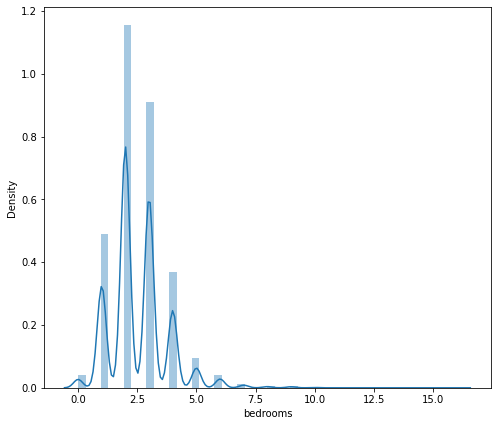

In [ ]:
# построим гистограммы, оценим данные.
import seaborn as sns
plt.figure(figsize=(8,7)) 
sns.distplot(data['bedrooms']) 
plt.show()   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


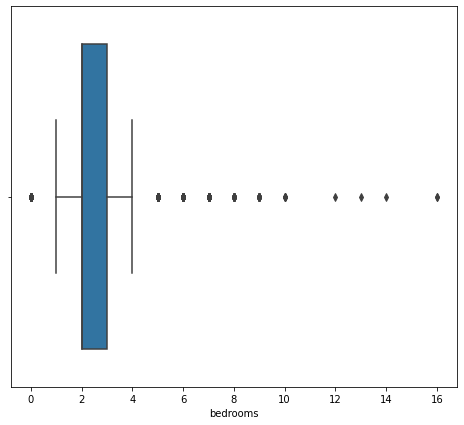

In [ ]:
plt.figure(figsize=(8,7)) 
sns.boxplot(data['bedrooms']) 
plt.show() 

In [ ]:
# из графиков количества ванных комнат видно, что количество комнат выше 6 минимально
# и скорее всего эту часть данных можно отсечь
# данные перезапишем
data = data[data['bedrooms'] < 7]

In [ ]:
data.describe()

,bedrooms,finishedsqft,lastsoldprice,latitude,yearbuilt,zestimate,zipcode,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
count,10640.000000,10640.000000,1.064000e+04,10640.000000,10640.000000,1.064000e+04,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000
mean,2.494455,1533.721241,1.227406e+06,37.759801,194.464192,1.515382e+06,94116.897556,1.811372,0.066424,2013.803195,1.755639,0.436184,0.011184,0.002162,0.038816,0.506015,0.005639
std,1.107514,849.432287,9.412171e+05,0.025606,3.771811,1.131191e+06,9.462490,0.863698,0.169599,1.451665,12.322570,0.495934,0.105167,0.046445,0.193165,0.499987,0.074885
min,0.000000,1.000000,5.350000e+02,37.708170,186.000000,4.323850e+05,94102.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1001.750000,7.250000e+05,37.739363,191.000000,8.947672e+05,94110.000000,1.000000,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1340.000000,9.750000e+05,37.760581,194.000000,1.211481e+06,94115.000000,2.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1830.000000,1.410000e+06,37.781386,198.000000,1.689348e+06,94123.000000,2.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,27275.000000,1.800000e+07,37.806083,201.000000,1.553325e+07,94158.000000,7.000000,0.800000,2016.000000,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


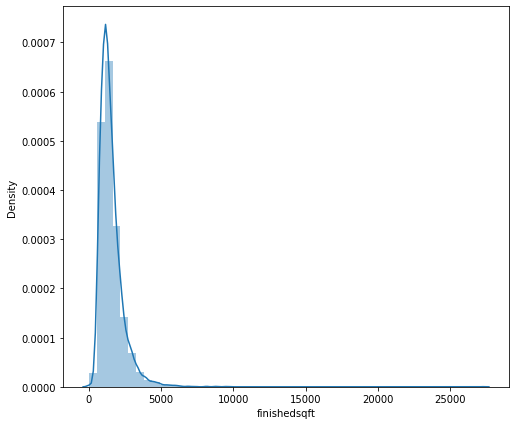

In [ ]:
# сделаем так же с квадратурой 
plt.figure(figsize=(8,7)) 
sns.distplot(data['finishedsqft']) 
plt.show()  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


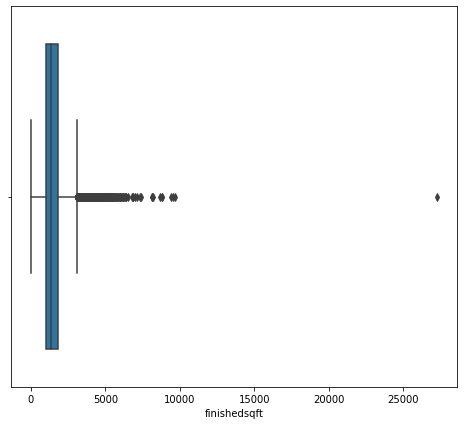

In [ ]:
plt.figure(figsize=(8,7)) 
sns.boxplot(data['finishedsqft']) 
plt.show() 

In [ ]:
# на графиках видно, что есть выбросы в сторону 0
# посмотрим что это за значения
data.shape

(10640, 21)

In [ ]:
data = data[data['finishedsqft'] > 200]

In [ ]:
data.shape

(10630, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


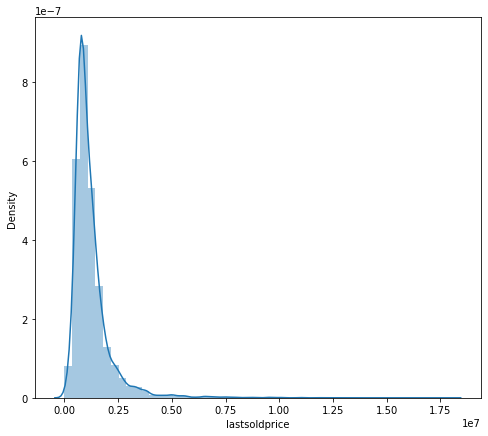

In [ ]:
# посмотрим на lastsoldprice
plt.figure(figsize=(8,7)) 
sns.distplot(data['lastsoldprice']) 
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


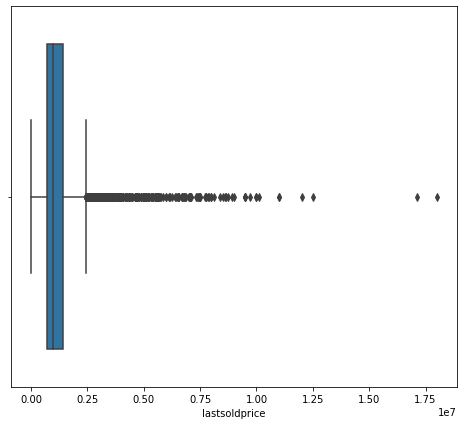

In [ ]:
plt.figure(figsize=(8,7)) 
sns.boxplot(data['lastsoldprice']) 
plt.show() 

In [ ]:
# посмотрим на значение цены выше порога 10**7
data[data['lastsoldprice'] > 10 ** 7]


,z_address,bedrooms,finishedsqft,lastsoldprice,latitude,neighborhood,yearbuilt,zestimate,zindexvalue,zipcode,...,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
523,Broadway St,5.0,6800.0,17100000.0,37.793580,Pacific Heights,196,15533253.0,"1,910,700",94115.0,...,6.0,0.0,2015,2.0,0.0,0.0,0.0,0.0,1.0,0.0
1611,Vallejo St,4.0,8675.0,12500000.0,37.794151,Pacific Heights,191,13296066.0,"1,884,400",94123.0,...,6.0,0.5,2015,6.0,0.0,0.0,0.0,0.0,1.0,0.0
2298,Vallejo St,5.0,6111.0,12000000.0,37.793668,Pacific Heights,193,12607097.0,"1,884,400",94123.0,...,6.0,0.5,2015,3.0,0.0,0.0,0.0,0.0,1.0,0.0
2413,Sea Cliff Ave,5.0,3585.0,11000000.0,37.789018,Sea Cliff,191,11368935.0,other,94121.0,...,2.0,0.0,2015,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2879,Pacific Ave,6.0,6520.0,10995000.0,37.793132,Pacific Heights,190,11161647.0,"1,884,400",94115.0,...,6.0,0.5,2015,2.0,0.0,0.0,0.0,0.0,1.0,0.0
5426,Lyon St,6.0,6175.0,10117500.0,37.792538,Pacific Heights,192,12288912.0,"1,884,400",94115.0,...,6.0,0.5,2014,3.0,0.0,0.0,0.0,0.0,1.0,0.0
8231,Jackson St,6.0,8820.0,18000000.0,37.790179,Presidio Heights,190,14658165.0,"5,244,900",94118.0,...,6.0,0.5,2013,6.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# значений очень мало, мы от них избавимся
data = data[data['lastsoldprice'] < 10 ** 7]

In [ ]:
data.describe()

,bedrooms,finishedsqft,lastsoldprice,latitude,yearbuilt,zestimate,zipcode,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
count,10622.000000,10622.000000,1.062200e+04,10622.000000,10622.000000,1.062200e+04,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000
mean,2.493033,1531.440030,1.218906e+06,37.759771,194.463943,1.506836e+06,94116.892393,1.808887,0.066301,2013.802956,1.755413,0.436547,0.011203,0.002165,0.038693,0.505743,0.005649
std,1.105446,836.759092,8.839565e+05,0.025603,3.771329,1.086922e+06,9.455359,0.857958,0.169466,1.451945,12.332808,0.495981,0.105255,0.046485,0.192872,0.499991,0.074948
min,0.000000,243.000000,5.350000e+02,37.708170,186.000000,4.323850e+05,94102.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1003.000000,7.250000e+05,37.739345,191.000000,8.943875e+05,94110.000000,1.000000,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1340.000000,9.750000e+05,37.760581,194.000000,1.211079e+06,94115.000000,2.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1828.000000,1.410000e+06,37.781386,198.000000,1.688524e+06,94123.000000,2.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,27275.000000,9.998000e+06,37.806083,201.000000,1.337252e+07,94158.000000,7.000000,0.800000,2016.000000,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


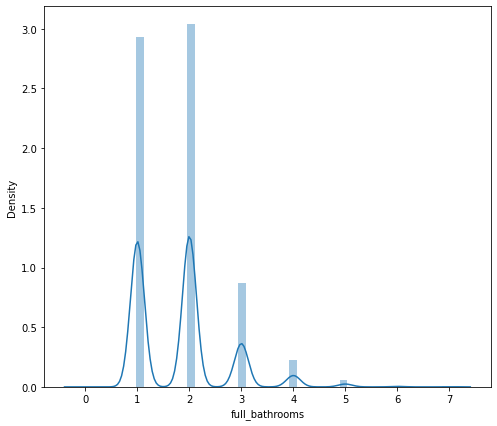

In [ ]:
# проверим теперь еще раз количество ванных комнат
plt.figure(figsize=(8,7)) 
sns.distplot(data['full_bathrooms']) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


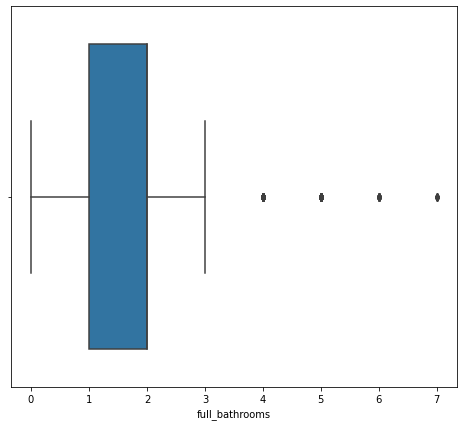

In [ ]:
plt.figure(figsize=(8,7)) 
sns.boxplot(data['full_bathrooms']) 
plt.show() 

In [ ]:
# оценим год продажи
data['sold_year'].value_counts()

2014    3097
2015    3092
2013    2603
2012    1267
2016     415
2011      94
2006       7
2003       7
2009       7
2007       6
2004       5
2010       3
1996       3
2008       3
1997       3
2005       2
2000       2
1988       1
1970       1
1992       1
1979       1
1998       1
2002       1
Name: sold_year, dtype: int64

In [ ]:
data[data['sold_year']  > 2010]

,z_address,bedrooms,finishedsqft,lastsoldprice,latitude,neighborhood,yearbuilt,zestimate,zindexvalue,zipcode,...,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
0,Mission St UNIT,2.0,1043.0,1300000.0,37.778705,South of Market,200,1167508.0,"975,700",94103.0,...,2.0,0.0,2016,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,King St UNIT,1.0,903.0,750000.0,37.777641,South of Market,200,823719.0,"975,700",94107.0,...,1.0,0.0,2016,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Missouri St,3.0,2231.0,2700000.0,37.761886,Potrero Hill,192,2411236.0,other,94107.0,...,3.0,0.0,2016,4.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Lowell St,2.0,1250.0,460000.0,37.710226,Crocker Amazon,192,703392.0,other,94112.0,...,1.0,0.0,2016,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Lakeview Ave,3.0,1032.0,532000.0,37.718024,Oceanview,193,741715.0,other,94112.0,...,1.0,0.0,2016,2.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,Laidley St,3.0,2100.0,1950000.0,37.739623,Glen Park,190,1895813.0,"1,628,900",94131.0,...,2.0,0.0,2016,5.0,0.0,0.0,0.0,0.0,1.0,0.0
11326,Tehama St,2.0,977.0,1030000.0,37.775184,South of Market,200,999443.0,"957,300",94103.0,...,2.0,0.0,2016,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11327,De Long St,2.0,875.0,565000.0,37.709411,Outer Mission,195,639167.0,"804,400",94112.0,...,1.0,0.0,2016,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11328,48th Ave,2.0,697.0,762000.0,37.755586,Outer Sunset,190,703197.0,"1,030,300",94122.0,...,1.0,0.0,2016,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# уберем выбросы связанные с продажей в ранние годы - таких значений мало и они будут ухудшать модель
data = data[data['sold_year']  > 2010]

In [ ]:
data.to_csv('clean_resul_final_data.csv')